### Libraries

In [1]:
import os
import pandas as pd

### Upload Dataset

In [2]:
# Get the current working directory
directorio_actual = os.getcwd()

# Specify the relative path from the current directory
ruta_csv_relativa = os.path.join('..', 'data', '03_primary','3.spotify.csv')

# Load the CSV file

spotify = pd.read_csv(ruta_csv_relativa)
spotify.head(5)

,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.461947,0.920689,0.494433,0.751530,0.050533,0.780650,0.506999,0.669059,0.460989,0.718593,0.301970,acoustic,0,0.311636,1
1,0.387347,0.849624,0.328098,0.994567,0.136151,0.510439,0.344792,0.394881,0.165983,0.268342,0.243282,acoustic,0,0.069720,1
2,0.446450,0.858572,0.244770,0.887294,0.000000,0.541840,0.441037,0.414159,0.358987,0.120603,0.236770,acoustic,0,0.157242,1
3,0.439024,0.913703,0.131397,0.993063,0.309253,0.567599,0.336466,0.229945,0.059581,0.143719,0.830006,acoustic,0,0.015854,1
4,0.436375,0.949954,0.229607,0.945470,0.000000,0.468269,0.442250,0.606940,0.442989,0.167839,0.482246,acoustic,0,0.273774,1


### Standar_Scaled

Explicar porque se realizo esto (en ingles)

In [3]:
from sklearn.preprocessing import StandardScaler

# Seleccionar características a estandarizar
features = ['duration_ms_scaled', 'popularity_scaled', 'speechiness_scaled', 'acousticness_scaled',
            'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled',
            'danceability_scaled', 'energy_scaled', 'valence_scaled', 'tempo_scaled']

# Escalar las características
scaler = StandardScaler()
X_normalized = spotify[features]
X_scaled = scaler.fit_transform(X_normalized)
spotify[features] = X_scaled  # Sobrescribir las columnas originales con los valores escalados

# Verificar las primeras filas del DataFrame
spotify.head(5)

,duration_ms_scaled,popularity_scaled,speechiness_scaled,acousticness_scaled,instrumentalness_scaled,liveness_scaled,loudness_scaled,danceability_scaled,energy_scaled,valence_scaled,tempo_scaled,track_genre,track_genre_encoded,intensity,popularity_class
0,0.220383,1.175748,1.215603,-0.247385,-0.874528,1.118338,0.074817,0.628742,-0.722218,0.928477,-1.161034,acoustic,0,0.311636,1
1,-0.919183,0.769006,0.326866,0.943214,-0.652616,-0.643117,-1.610460,-0.856596,-1.898577,-0.802499,-1.513321,acoustic,0,0.069720,1
2,-0.016348,0.820217,-0.118358,0.417702,-1.005503,-0.438419,-0.610505,-0.752159,-1.128959,-1.370475,-1.552408,acoustic,0,0.157242,1
3,-0.129787,1.135763,-0.724115,0.935844,-0.203954,-0.270505,-1.696960,-1.750120,-2.322864,-1.281608,2.008565,acoustic,0,0.015854,1
4,-0.170243,1.343246,-0.199375,0.702694,-1.005503,-0.918015,-0.597901,0.292220,-0.793996,-1.188877,-0.078905,acoustic,0,0.273774,1


## Predictors

### CORR

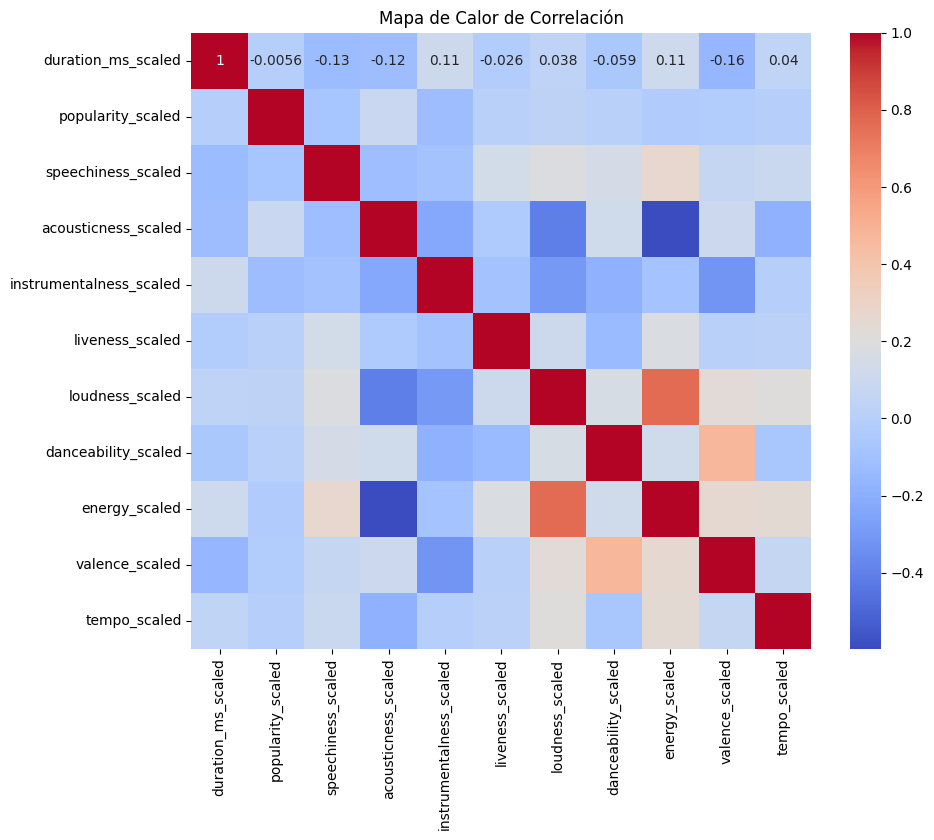

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapa de calor de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(spotify[features].corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de Calor de Correlación")
plt.show()

### Filtar caracteristicas con baja varianza

In [5]:
from sklearn.feature_selection import VarianceThreshold

# Filtrar características con baja varianza
selector = VarianceThreshold(threshold=0.01)  # Ajustar el umbral si es necesario
X_reduced = selector.fit_transform(X_scaled)

# Actualizar los nombres de las características seleccionadas
selected_features = [features[i] for i in range(len(features)) if selector.get_support()[i]]
print("Características seleccionadas:", selected_features)

Características seleccionadas: ['duration_ms_scaled', 'popularity_scaled', 'speechiness_scaled', 'acousticness_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'loudness_scaled', 'danceability_scaled', 'energy_scaled', 'valence_scaled', 'tempo_scaled']


### Seleccionar las caracteristicas importantes

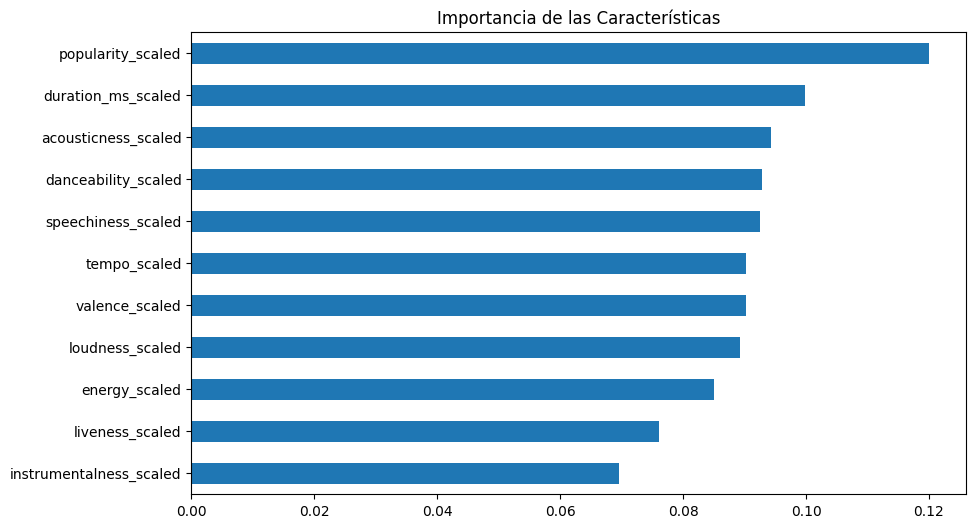

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Asegúrate de que `track_genre_encoded` está definido y codificado como numérico
if 'track_genre_encoded' not in spotify.columns:
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    spotify['track_genre_encoded'] = encoder.fit_transform(spotify['track_genre'])

# Entrenar el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_reduced, spotify['track_genre_encoded'])

# Mostrar importancia de las características seleccionadas
importances = pd.Series(rf.feature_importances_, index=selected_features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title="Importancia de las Características")
plt.show()

### Top Features

In [7]:
top_features = ['popularity_scaled', 'duration_ms_scaled', 'acousticness_scaled', 
                'danceability_scaled', 'speechiness_scaled']
X_top = spotify[top_features]
X_top.head(5)

,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
0,1.175748,0.220383,-0.247385,0.628742,1.215603
1,0.769006,-0.919183,0.943214,-0.856596,0.326866
2,0.820217,-0.016348,0.417702,-0.752159,-0.118358
3,1.135763,-0.129787,0.935844,-1.750120,-0.724115
4,1.343246,-0.170243,0.702694,0.292220,-0.199375


# k-means

### Método del Codo y Silhouette Score

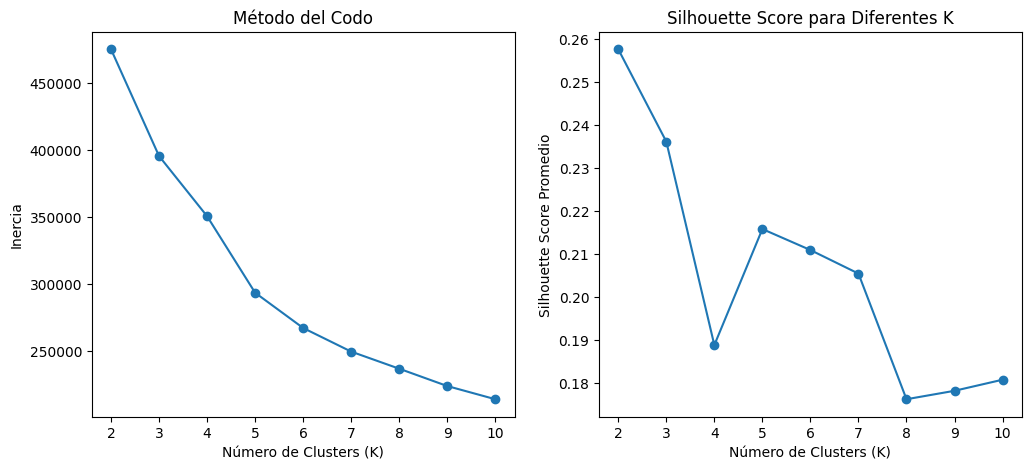

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Método del codo
inertia = []
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_top)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_top, kmeans.labels_))

# Gráfico del método del codo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo')

# Gráfico del Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score Promedio')
plt.title('Silhouette Score para Diferentes K')
plt.show()


### Aplicación de K-means y Centroides

In [44]:
# Usar el valor óptimo de K
k_optimal = 3  # Ajustar según el análisis
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
spotify['kmeans_cluster'] = kmeans.fit_predict(X_top)

# Centroides de los clusters
print("Centroides de los clusters:")
print(kmeans.cluster_centers_)

Centroides de los clusters:
[[-0.3058655   0.35486512 -1.59817105 -0.46770571  0.10837631]
 [-0.23007772 -0.3958348   0.26781364  0.7642174   1.22972959]
 [ 0.21122735  0.03942876  0.47268652 -0.15606579 -0.56771179]]


## Visualización de cluster con PCA

### PCA Antes

C:\Users\Juako\AppData\Local\Temp\ipykernel_29360\3290332066.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], alpha=0.7, s=50, cmap='viridis')


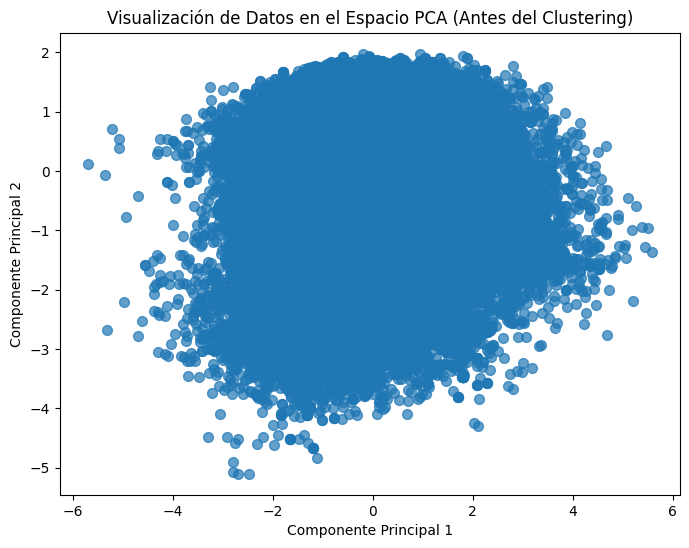

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_top)

# Visualizar los datos sin asignación de clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], alpha=0.7, s=50, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización de Datos en el Espacio PCA (Antes del Clustering)")
plt.show()

### PCA Despues

C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
C:\Users\Juako\Programación\Spotify-Recomendation-Machine-Learning\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


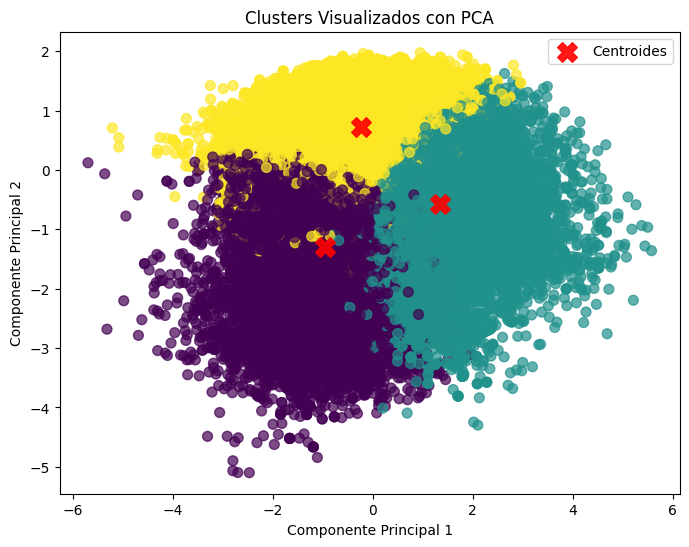

In [46]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spotify['kmeans_cluster'], cmap='viridis', alpha=0.7, s=50)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], 
            c='red', marker='X', s=200, alpha=0.9, label='Centroides')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters Visualizados con PCA")
plt.legend()
plt.show()

##  Evaluación del Clustering con Silhouette Score

In [19]:
silhouette_avg = silhouette_score(X_top, spotify['kmeans_cluster'])
print(f"Silhouette Score Promedio para K={k_optimal}: {silhouette_avg:.3f}")

Silhouette Score Promedio para K=3: 0.236


## Interpretación

### Resumen de Características Promedio por Cluster

In [25]:
# Calcular promedios por cluster
cluster_summary = spotify.groupby('kmeans_cluster')[top_features].mean()

print("Resumen de características promedio por cluster:")
cluster_summary

Resumen de características promedio por cluster:


,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
kmeans_cluster,,,,,
0,-0.306629,0.355561,-1.597344,-0.467768,0.107415
1,-0.230381,-0.395383,0.267730,0.763918,1.236205
2,0.210820,0.038058,0.472299,-0.154014,-0.566590


### Mapa de Calor

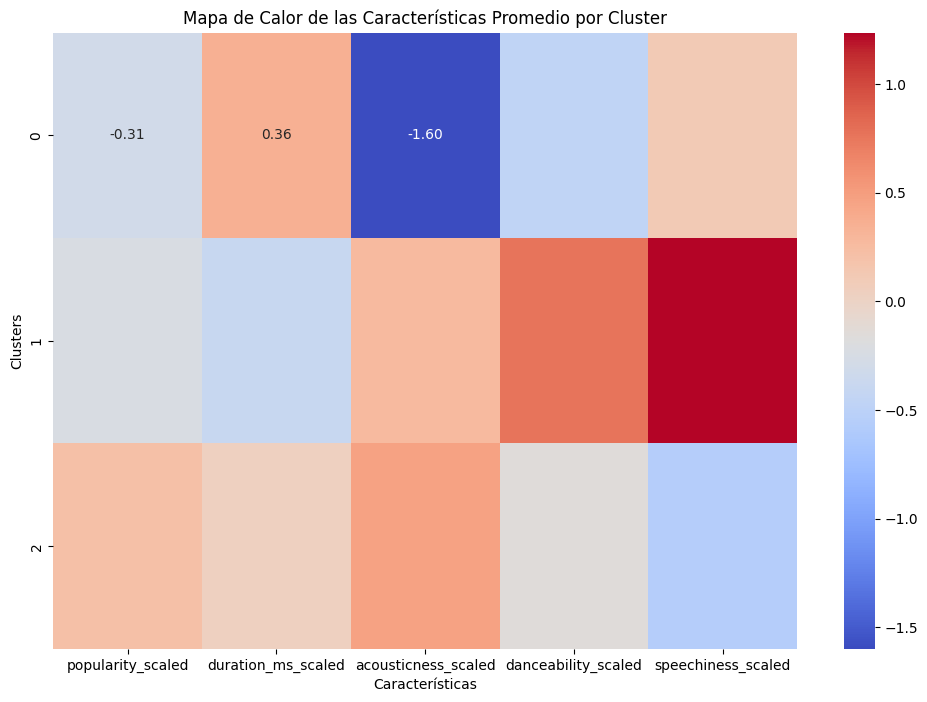

In [21]:
import seaborn as sns

# Graficar un mapa de calor para las características promedio
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor de las Características Promedio por Cluster")
plt.xlabel("Características")
plt.ylabel("Clusters")
plt.show()


## Resultados

**Análisis del K-Means**

A continuación, se presenta la interpretación de los clusters generados por el modelo **K-Means**, utilizando las características seleccionadas.

---

**Resumen de las Características Promedio por Cluster**

| Cluster | Popularidad (`popularity_scaled`) | Duración (`duration_ms_scaled`) | Acústica (`acousticness_scaled`) | Bailabilidad (`danceability_scaled`) | Contenido Hablado (`speechiness_scaled`) |
|---------|-----------------------------------|----------------------------------|----------------------------------|--------------------------------------|------------------------------------------|
| **0**   | -0.306629                        |  0.355561                       | -1.597344                       | -0.467768                            |  0.107415                               |
| **1**   | -0.230381                        | -0.395383                       |  0.267730                       |  0.763918                            |  1.236205                               |
| **2**   |  0.210820                        |  0.038058                       |  0.472299                       | -0.154014                            | -0.566590                               |

---

**Interpretación por Cluster**

**Cluster 0**
- Canciones **poco populares** (`popularity_scaled` = -0.306629).
- **Largas** (`duration_ms_scaled` = 0.355561).
- Muy **poco acústicas** (`acousticness_scaled` = -1.597344).
- **Moderadamente bailables** (`danceability_scaled` = -0.467768).
- Contenido hablado **balanceado** (`speechiness_scaled` = 0.107415).

**Cluster 1**
- Canciones de **popularidad moderada-baja** (`popularity_scaled` = -0.230381).
- **Cortas** (`duration_ms_scaled` = -0.395383).
- Ligera inclinación hacia lo **acústico** (`acousticness_scaled` = 0.267730).
- **Muy bailables** (`danceability_scaled` = 0.763918).
- Canciones con **alto contenido hablado** (`speechiness_scaled` = 1.236205).

**Cluster 2**
- Canciones **más populares** (`popularity_scaled` = 0.210820).
- **Duración promedio** (`duration_ms_scaled` = 0.038058).
- Ligera inclinación hacia lo **acústico** (`acousticness_scaled` = 0.472299).
- **Menos bailables** (`danceability_scaled` = -0.154014).
- Canciones con **bajo contenido hablado** (`speechiness_scaled` = -0.566590).

---

**Conclusión**
El modelo K-Means generó 3 clusters que pueden interpretarse de la siguiente manera:
1. **Cluster 0**: Canciones largas y poco populares, con baja acústica y bailabilidad moderada.
2. **Cluster 1**: Canciones cortas, bailables y con contenido hablado alto.
3. **Cluster 2**: Canciones más populares, con características balanceadas, menor bailabilidad y bajo contenido hablado.

# DBSCAN

### Codo

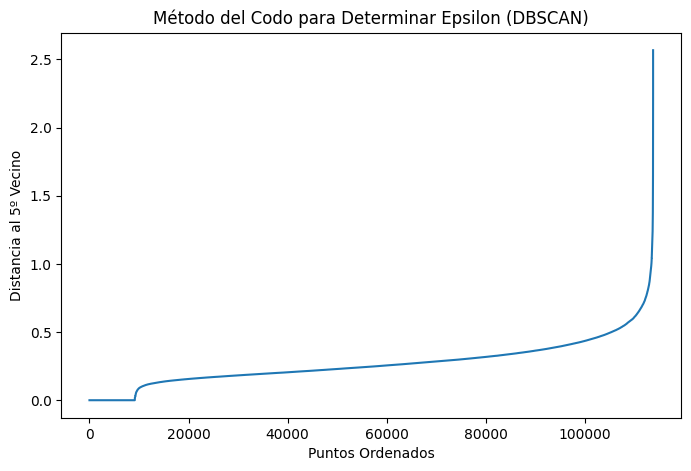

In [34]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calcular las distancias k-vecinas
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_top)
distances, indices = neighbors_fit.kneighbors(X_top)

# Ordenar las distancias
distances = np.sort(distances[:, -1])  # Distancias al quinto vecino más cercano
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('Método del Codo para Determinar Epsilon (DBSCAN)')
plt.xlabel('Puntos Ordenados')
plt.ylabel('Distancia al 5º Vecino')
plt.show()

### Epsilon

In [35]:
from sklearn.cluster import DBSCAN
import numpy as np
# Ajustar el parámetro epsilon basado en el codo
epsilon = 0.5  # Ajusta entre 0.5 y 0.6 según los resultados
min_samples = 5  # Mantén el valor inicial o ajusta según la densidad esperada

# Aplicar DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
spotify['dbscan_cluster'] = dbscan.fit_predict(X_top)

# Revisar clusters generados
print("Clusters únicos generados por DBSCAN:")
print(np.unique(spotify['dbscan_cluster']))


Clusters únicos generados por DBSCAN:
[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171]


### Evaluar Clustergin

In [36]:
print(spotify['dbscan_cluster'].value_counts())

dbscan_cluster
 0      105847
-1        5132
 1        1530
 38         61
 92         39
         ...  
 126         4
 170         4
 102         3
 151         3
 163         3
Name: count, Length: 173, dtype: int64


In [13]:
from sklearn.metrics import silhouette_score
non_noise_mask = spotify['dbscan_cluster'] != -1
if non_noise_mask.sum() > 0:
    silhouette_avg = silhouette_score(X_scaled[non_noise_mask], spotify['dbscan_cluster'][non_noise_mask])
    print(f"Silhouette Score Promedio para DBSCAN: {silhouette_avg:.3f}")
else:
    print("No hay suficientes puntos no marcados como ruido para calcular el Silhouette Score.")

Silhouette Score Promedio para DBSCAN: -0.257


## Visualización de cluster con PCA

### PCA Antes

C:\Users\Juako\AppData\Local\Temp\ipykernel_6740\2163532840.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)


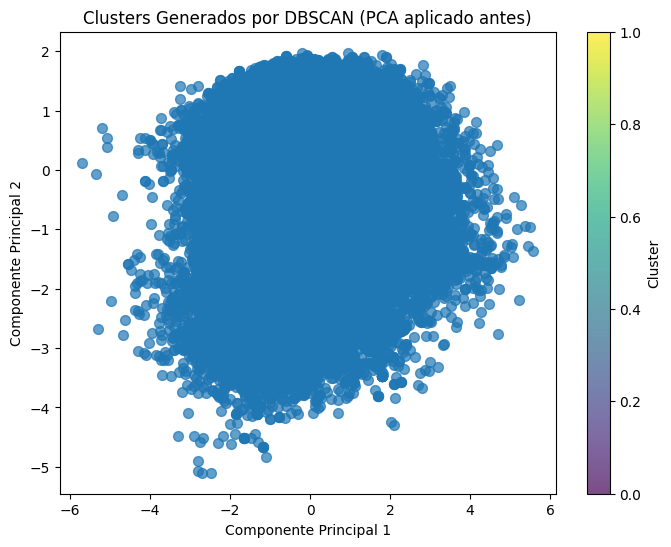

In [42]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA antes de DBSCAN
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_top)

# Graficar clusters generados en el espacio PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)
plt.title("Clusters Generados por DBSCAN (PCA aplicado antes)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()

### PCA Despues

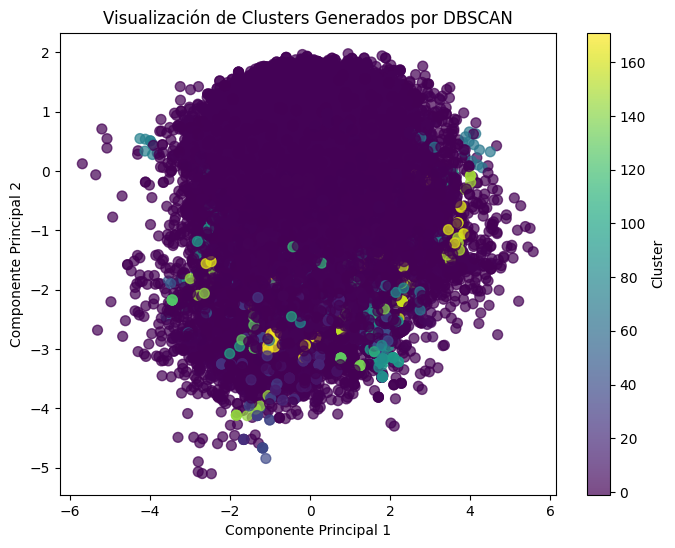

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top)

# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=spotify['dbscan_cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title("Visualización de Clusters Generados por DBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


## Interpretación

### Resumen de Caracteristicas

In [17]:
# Resumen de características promedio por cluster
cluster_summary = spotify[spotify['dbscan_cluster'] != -1].groupby('dbscan_cluster')[top_features].mean()
print("Resumen de características promedio por cluster:")
cluster_summary

Resumen de características promedio por cluster:


,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
dbscan_cluster,,,,,
0,0.135958,0.017176,0.042154,0.012137,-0.047736
1,-4.093858,-0.060171,0.179356,0.307616,-0.218148
2,0.630811,1.191752,0.567717,-1.892852,1.100129
3,-1.305986,-1.378595,-0.418912,1.737413,2.323432
4,-3.478818,0.183055,-1.324642,-1.437129,0.467476
...,...,...,...,...,...
167,0.175814,-0.222740,-1.077716,-2.921564,1.749099
168,0.115746,-2.071572,-3.461093,-2.693252,1.342522
169,0.112521,-0.409227,0.882109,-2.546749,1.498362


### Mapa de calor

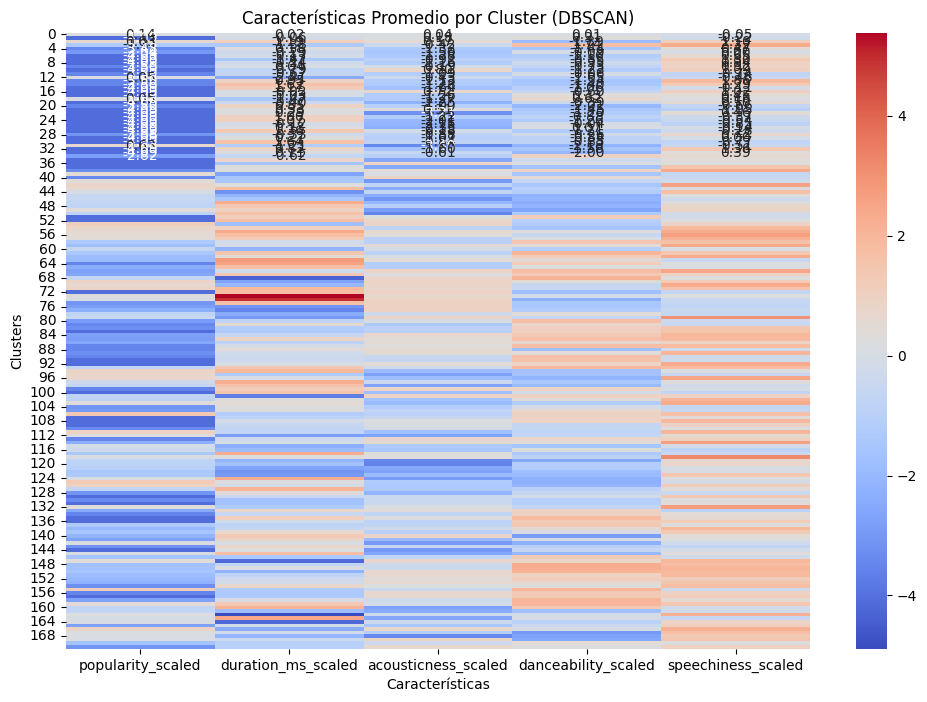

In [16]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Características Promedio por Cluster (DBSCAN)")
plt.xlabel("Características")
plt.ylabel("Clusters")
plt.show()

## Resultados

**Análisis del DBSCAN**

El modelo **DBSCAN** generó un total de **171 clusters**, incluyendo un grupo especial designado como `-1`, que representa puntos considerados como ruido (es decir, datos que no pertenecen a ningún cluster principal). A continuación, se analiza esta configuración y los resultados.

---

**Resumen del Modelo**

**Características Globales**
- **Clusters Identificados:** 171
- **Ruido:** 
  - Cantidad de puntos marcados como ruido: 5,132 (4.51% del total).
  - El cluster `-1` representa estos puntos.
- **Clusters Principales:**
  - La mayoría de los puntos se agruparon en el **Cluster 0** (105,847 puntos, más del 92% del total).
  - Los demás clusters contienen cantidades significativamente más pequeñas de puntos.

---

**Desafíos del DBSCAN con 171 Clusters**

1. **Cluster Dominante:**
   - Más del 92% de los datos se encuentran en el **Cluster 0**, lo que sugiere que DBSCAN no logró separar adecuadamente subgrupos dentro de este cluster mayoritario.

2. **Clusters Pequeños:**
   - Muchos clusters tienen una cantidad mínima de puntos, lo que puede dificultar su interpretación práctica o la extracción de insights útiles.

3. **Ruido:**
   - Un 4.51% de los puntos fueron clasificados como ruido (`-1`), lo que puede indicar datos atípicos o regiones con densidades bajas.

4. **Complejidad:**
   - Aunque DBSCAN es efectivo para detectar estructuras arbitrarias en los datos, la gran cantidad de clusters puede dificultar su uso para fines prácticos o escalables.

---

**Conclusión**

El modelo DBSCAN no cumplió con las expectativas iniciales debido a:
- Una sobresaturación en el cluster mayoritario.
- Clusters pequeños que dificultan la generalización y el análisis interpretativo.


# Clustering Jerarquico

### Selección de muestra

In [10]:
# Seleccionar 20,000 muestras aleatorias de X_top
sample_size = 20000
X_top_sample = X_top.sample(n=sample_size, random_state=42)  # random_state para resultados reproducibles

# Verificar las dimensiones de la muestra
print(f"Dimensiones de la muestra: {X_top_sample.shape}")

Dimensiones de la muestra: (20000, 5)


In [22]:
from scipy.cluster.hierarchy import linkage

# Crear la matriz de enlace con el método de Ward
linkage_matrix = linkage(X_top_sample, method='ward')  # Cambia 'ward' por otros métodos si es necesario

### Dendograma

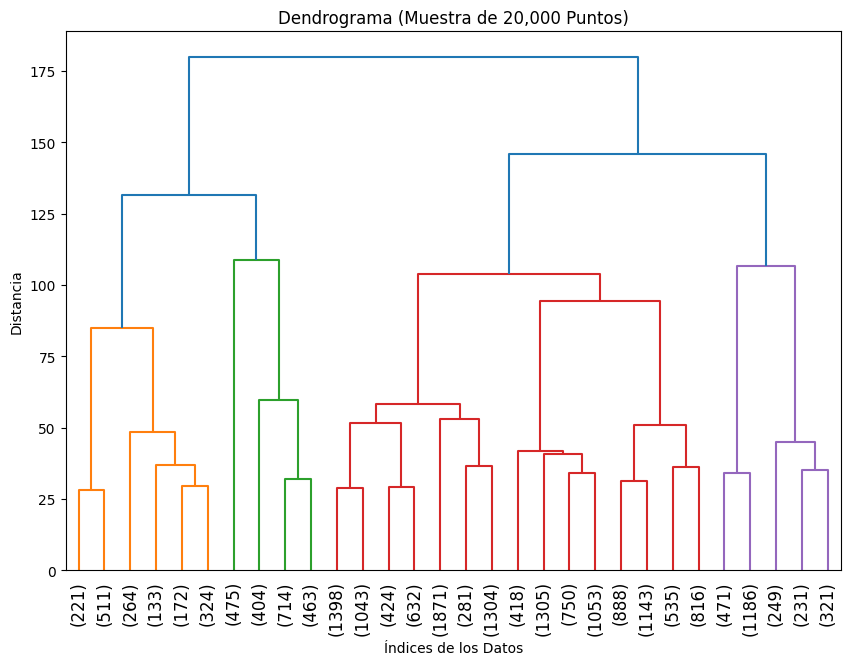

In [23]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Dendrograma (Muestra de 20,000 Puntos)")
plt.xlabel("Índices de los Datos")
plt.ylabel("Distancia")
plt.show()


### Definir los Clusters

In [30]:
from scipy.cluster.hierarchy import fcluster

# Cortar el dendrograma en 4 clusters (ajusta según lo observado en el dendrograma)
n_clusters = 4
clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Agregar clusters al DataFrame de la muestra
X_top_sample['hierarchical_cluster'] = clusters

# Ver distribución de los clusters
print(X_top_sample['hierarchical_cluster'].value_counts())

hierarchical_cluster
3    13861
4     2458
2     2056
1     1625
Name: count, dtype: int64


## Visualización de Cluster con PCA

### PCA Antes

C:\Users\Juako\AppData\Local\Temp\ipykernel_6740\2982672936.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)


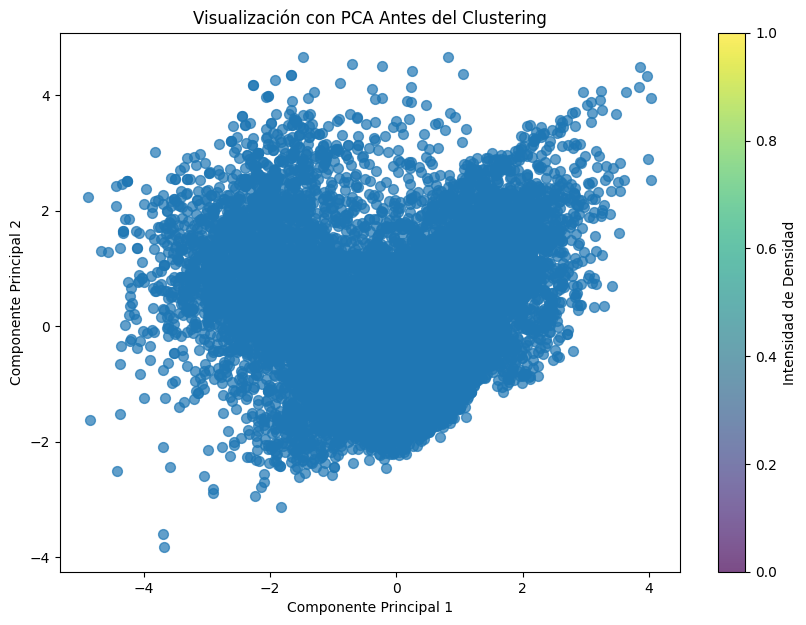

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 2 dimensiones con PCA antes del clustering
pca_before = PCA(n_components=2)
X_pca_before = pca_before.fit_transform(X_top_sample)  # Datos escalados

# Graficar los datos originales
plt.figure(figsize=(10, 7))
plt.scatter(X_pca_before[:, 0], X_pca_before[:, 1], cmap='viridis', alpha=0.7, s=50)
plt.title("Visualización con PCA Antes del Clustering")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Intensidad de Densidad")
plt.show()


### PCA Despues

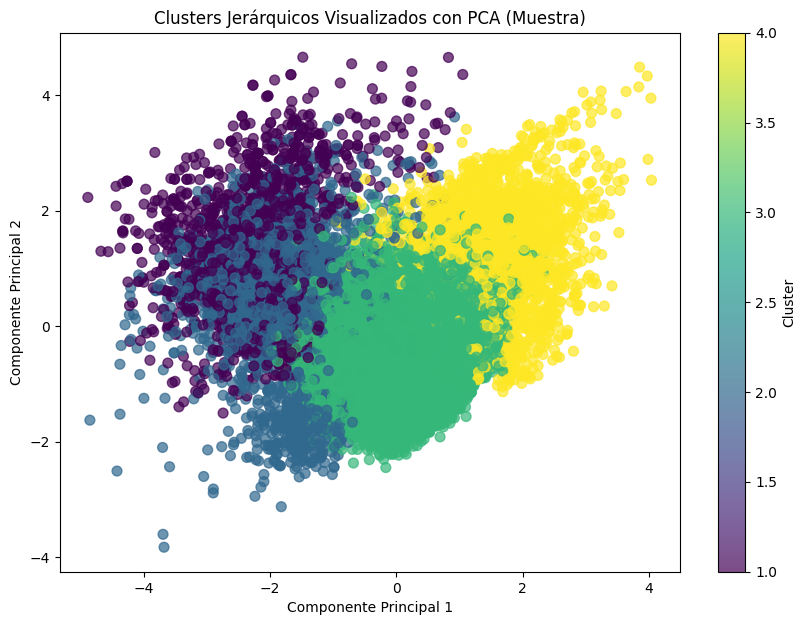

In [25]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_top_sample)

# Graficar los clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X_top_sample['hierarchical_cluster'], cmap='viridis', alpha=0.7, s=50)
plt.title("Clusters Jerárquicos Visualizados con PCA (Muestra)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


## Interpretación

### Resumen de Caracteristicas

In [26]:
# Calcular características promedio por cluster
cluster_summary = X_top_sample.groupby('hierarchical_cluster').mean()
print("Resumen de características promedio por cluster:")
cluster_summary

Resumen de características promedio por cluster:


,popularity_scaled,duration_ms_scaled,acousticness_scaled,danceability_scaled,speechiness_scaled
hierarchical_cluster,,,,,
1,-2.206835,0.675129,-0.453533,0.539707,0.209177
2,-0.115257,0.320376,-1.647887,-1.064732,0.216863
3,0.268447,0.011508,0.236336,0.013856,-0.330030
4,0.139930,-0.796282,0.335610,0.550528,1.594345


### Mapa de calor

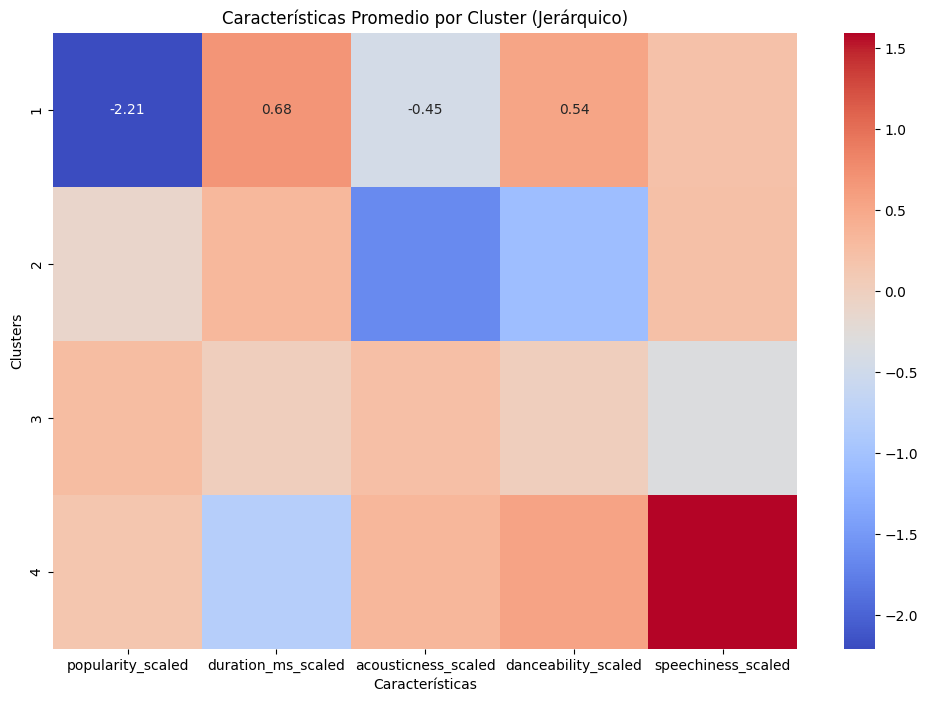

In [27]:
# Visualizar con un mapa de calor
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_summary, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Características Promedio por Cluster (Jerárquico)")
plt.xlabel("Características")
plt.ylabel("Clusters")
plt.show()

## Resultados

**Análisis del Clustering Jerárquico**

El modelo **Clustering Jerárquico** generó 4 clusters, los cuales fueron analizados con base en las características promedio escaladas.

---

**Resumen de las Características Promedio por Cluster**

| Cluster | Popularidad (`popularity_scaled`) | Duración (`duration_ms_scaled`) | Acústica (`acousticness_scaled`) | Bailabilidad (`danceability_scaled`) | Contenido Hablado (`speechiness_scaled`) |
|---------|-----------------------------------|----------------------------------|----------------------------------|--------------------------------------|------------------------------------------|
| **1**   | -2.207                           |  0.675                          | -0.454                          |  0.540                               |  0.209                                  |
| **2**   | -0.115                           |  0.320                          | -1.648                          | -1.065                               |  0.217                                  |
| **3**   |  0.268                           |  0.012                          |  0.236                          |  0.014                               | -0.330                                  |
| **4**   |  0.140                           | -0.796                          |  0.336                          |  0.551                               |  1.594                                  |

---

**Interpretación por Cluster**

**Cluster 1**
- **Popularidad:** Muy baja (-2.207), lo que indica canciones impopulares.
- **Duración:** Canciones largas (0.675), por encima del promedio.
- **Acústica:** Ligeramente baja (-0.454), con menor inclinación hacia la acústica.
- **Bailabilidad:** Moderadamente bailables (0.540).
- **Contenido Hablado:** Levemente positivo (0.209), indicando un contenido hablado balanceado.

---

**Cluster 2**
- **Popularidad:** Cercana al promedio (-0.115).
- **Duración:** Canciones algo largas (0.320).
- **Acústica:** Muy baja (-1.648), indicando menor inclinación acústica.
- **Bailabilidad:** Baja (-1.065), agrupando canciones menos orientadas al baile.
- **Contenido Hablado:** Levemente positivo (0.217), indicando algo de contenido hablado.

---

**Cluster 3**
- **Popularidad:** Positiva (0.268), agrupando canciones más populares.
- **Duración:** Balanceada (0.012), cercana al promedio.
- **Acústica:** Ligeramente acústicas (0.236).
- **Bailabilidad:** Balanceada (0.014), ni alta ni baja.
- **Contenido Hablado:** Ligeramente bajo (-0.330).

---

**Cluster 4**
- **Popularidad:** Ligeramente positiva (0.140), con canciones más populares.
- **Duración:** Canciones cortas (-0.796), significativamente por debajo del promedio.
- **Acústica:** Moderadamente acústicas (0.336).
- **Bailabilidad:** Moderadamente alta (0.551).
- **Contenido Hablado:** Muy alto (1.594), con un fuerte enfoque en contenido hablado.

---

**Conclusión**

El modelo **Clustering Jerárquico** logró dividir las canciones en 4 grupos claros y diferenciados:

1. **Cluster 1:** Canciones largas, impopulares y balanceadas en características.
2. **Cluster 2:** Canciones con baja acústica y bailabilidad.
3. **Cluster 3:** Canciones populares con características balanceadas.
4. **Cluster 4:** Canciones cortas, populares y con alto contenido hablado.

# Resultados finales

# **Comparativa de Métodos de Clustering**

A continuación, se presenta un análisis comparativo de los tres métodos de clustering utilizados: **K-Means**, **DBSCAN** y **Clustering Jerárquico**.

---

## **K-Means**

### Ventajas:
- Genera clusters claramente diferenciados.
- Ideal para datasets con clusters de forma esférica y tamaños similares.
- Identificó 3 clusters con interpretaciones claras basadas en las características.

### Desventajas:
- Supone que todos los clusters tienen formas similares (esféricas).
- Sensible a los valores iniciales de los centroides y al escalado de las características.

### Conclusión:
El modelo **K-Means** proporcionó clusters bien definidos y útiles para el análisis. Fue capaz de separar las canciones en categorías interpretables como:
1. Canciones largas y poco populares.
2. Canciones cortas y bailables con alto contenido hablado.
3. Canciones más populares con características balanceadas.

---

## **DBSCAN**

### Ventajas:
- Detecta clusters de formas arbitrarias y puede manejar ruido.
- Identificó un pequeño porcentaje de puntos como ruido (4.51%).

### Desventajas:
- Produjo un cluster dominante (92% de los datos en el Cluster 0), lo que indica una incapacidad para capturar subestructuras significativas.
- Generó 171 clusters, muchos de ellos extremadamente pequeños y poco prácticos.
- Un **Silhouette Score** negativo (-0.257) sugiere una agrupación inconsistente.

### Conclusión:
**DBSCAN** no cumplió con las expectativas debido a una alta concentración de puntos en un único cluster y a la generación de numerosos clusters pequeños. Es probable que los parámetros (`epsilon` y `min_samples`) no fueran adecuados para este dataset o que las estructuras no se ajustaran a la densidad esperada por el modelo.

---

## **Clustering Jerárquico**

### Ventajas:
- No requiere predefinir el número de clusters.
- Permite una visualización clara de las relaciones jerárquicas entre los datos mediante el dendrograma.
- Generó 4 clusters claros y fácilmente interpretables.

### Desventajas:
- Requiere muchos recursos para datasets grandes.
- Sensible al método de enlace (ward, promedio, completo, etc.).

### Conclusión:
El modelo jerárquico dividió los datos en 4 clusters bien definidos, con características distintivas. Ofreció interpretaciones detalladas y útiles, agrupando canciones en categorías claras como:
1. Canciones largas y poco populares.
2. Canciones con baja acústica y bailabilidad.
3. Canciones populares con características balanceadas.
4. Canciones cortas, populares y con alto contenido hablado.

---

## **Recomendación Final**

1. **K-Means** es la mejor opción para este dataset, ya que proporcionó clusters prácticos, interpretables y equilibrados.
2. **Clustering Jerárquico** es una excelente alternativa si se busca una visualización jerárquica o si no se quiere predefinir el número de clusters.
3. **DBSCAN** no es adecuado para este dataset debido a la concentración excesiva en un único cluster y a la generación de muchos clusters pequeños.

---

## **Visualización Final**

Para cada modelo:
- **K-Means:** Utiliza los clusters para interpretar patrones y comportamientos claros.
- **Clustering Jerárquico:** Aprovecha el dendrograma para identificar relaciones jerárquicas.
- **DBSCAN:** Si decides usarlo, ajusta los parámetros para evitar un cluster dominante. 

**K-Means es el modelo más práctico para este caso.**
